### 타이타닉 데이터 시각화 with matplotlib

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 탑승 항구에 따른 생존율 차이 분석

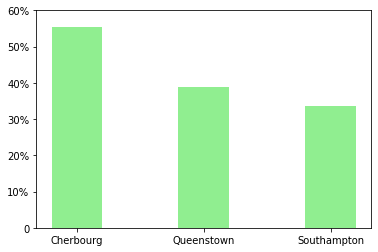

In [27]:
g1=titanic.groupby('embarked')['survived'].mean()*100
embark_town=['Cherbourg','Queenstown','Southampton']

plt.bar(range(len(g1)),g1,width=0.4,color='lightgreen')
plt.yticks(np.arange(0,70,10),('0','10%','20%','30%','40%','50%','60%'))
plt.xticks(range(len(g1)),embark_town)
plt.show()



- 총 3개의 탑승 항구 중 Cherbourg에서 탑승한 승객이 생존율이 가장 높은 것을 확인할 수 있다.
- Cherbourg 항구 탑승 승객의 생존율에 영향을 미친 요소는 무엇일까?

#### Class에 따른 생존율 분석 

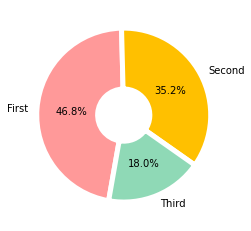

In [28]:
g2=titanic.groupby('class')['survived'].mean()
labels=['First','Second','Third']
colors=['#ff9999','#ffc000','#8fd9b6']
wedgeprops={'width':0.7,'edgecolor':'w','linewidth':5}
plt.pie(g2,labels=labels,autopct='%.1f%%',startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops)
plt.show()

- 클래스별 생존율 분석 결과 First class가 46.8%로 생존율이 가장 높고 그 다음은 Second, Third 순임을 확인할 수 있었다.
- 즉, 클래스이 높을수록 생존율도 비례함을 알 수 있었다.
- 그렇다면 Cherbourg 항구 탑승 승객은 First class가 많을까?

#### 탑승 항구의 Class별 탑승 승객 비교 

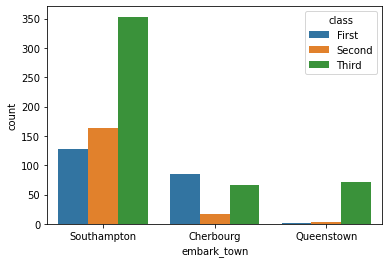

In [29]:
sns.countplot(x="embark_town",hue='class',data=titanic)
plt.show()

#### 탑승 항구의 Class별 생존자수 비교

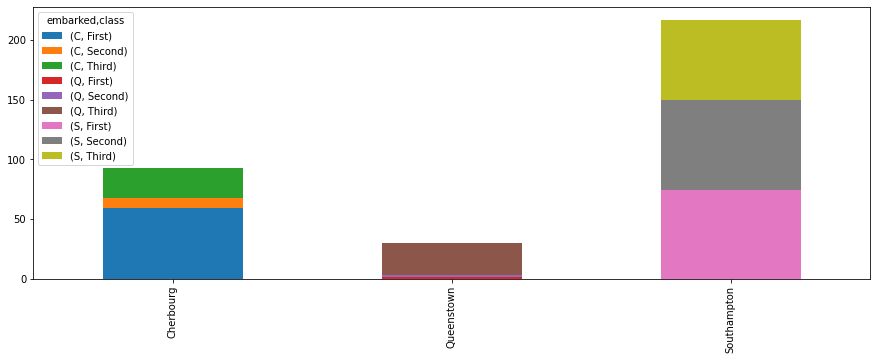

In [30]:
g3=titanic.groupby(['embarked','class'])['survived'].sum() 
df=pd.DataFrame([g3[:3],g3[3:6],g3[6:]])
df.index=embark_town
df.plot(kind='bar', stacked=True, figsize=(15,5))
plt.show()

- Cherbourg 항구 탑승 승객의 경우 First class의 생존자의 수가 가장 많음을 확인할 수 있었다.
- 그러나 First class의 생존자 수는 Southampton 항구 탑승 승객이 더 많음을 확인할 수 있었다. 
- 즉, Cherbourg 탑승 승객의 높은 생존율은 Class가 영향을 주지 않음을 확인할 수 있다.

#### 성별에 따른 생존율 분석

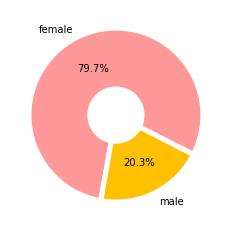

In [265]:
g4=titanic.groupby('sex')['survived'].mean()*100
labels=['female','male']
colors=['#ff9999','#ffc000']
wedgeprops={'width':0.7,'edgecolor':'w','linewidth':5}
plt.pie(g4,labels=labels,autopct='%.1f%%',startangle=260, counterclock=False,colors=colors,wedgeprops=wedgeprops)
plt.show()

- 성별에 따른 생존율 비교분석 결과 여성인 경우 74.2%로 높은 생존율을 기록한 것을 확인할 수 있음.
- 그렇다면 Cherbourg 탑승 승객의 경우 여성의 비율이 높은가?

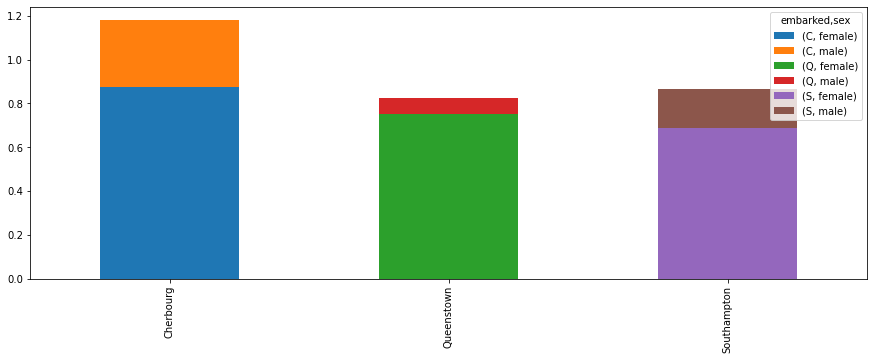

In [271]:
g5=titanic.groupby(['embarked','sex'])['survived'].mean()
df=pd.DataFrame([g5[:2],g5[2:4],g5[4:]])
df.index=embark_town

df.plot(kind='bar', stacked=True, figsize=(15,5))
plt.show()

- Cherbourg 항구 탑승 승객의 경우 여성 생존율이 다른 항구 탑승 승객의 생존율보다 높다는 것을 확인할 수 있음.
- 비록 Southampton 항구 탑승 승객이 First Class가 많았음에도 불구하고 상대적으로 남성의 생존율이 낮기때문에 
- Southampton 항구 탑승 승객의 생존율이 가장 낮게 나옴.
- 결국 항구별 탑승 승객의 생존율의 가장 큰 영향을 미치는 요소는 '성별'임을 확인할 수 있음.

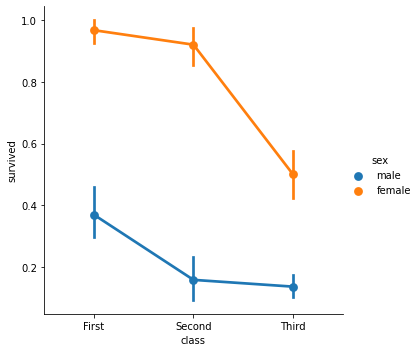

In [224]:
sns.factorplot('class','survived',hue='sex',data=titanic)
plt.show()

- 결국 Class는 생존율에 큰 영향을 미치지 않았고, 성별에 따라 높은 생존율을 나타내는 것을 확인할 수 있다.
- 즉 여성일수록 높은 생존율을 기록하고 있다.